# Python 統計学

## 統計学のキーワード
### 最小値・第一四分位数・中央値・第三四分位数・最大値・最頻値
### 範囲 $R$・四分位範囲 $IQR$
$$ R = max - min \ , \quad IQR = Q3 = Q1   $$
### 平均 $\bar{x}$、分散 $\sigma^2$、標準偏差 $\sigma$
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i \ , \quad
\sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2 \ , \quad
\sigma = \sqrt{\sigma^2}
$$
### 変動係数 $CV$
$$ CV = \frac{\sigma}{\bar{x}} $$
### 共分散 $s_{xy}$ 相関係数 $r_{xy}$
$$ s_{xy} = \frac{1}{n}\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y}) \ , \quad r_{xy} = \frac{s_{xy}}{\sigma_x \sigma_y} $$
### 偏相関係数
$$ r_{(yz \cdot x)} = \frac{r_{yx} - r_{xy}r_{xz}}{\sqrt{1-r_{xy}^2} \sqrt{1-r_{xz}^2}} $$
### 回帰係数
$$
\hat{\beta} = \frac{s_{xy}}{s_{x}^2} = r_{xy}\frac{s_y}{s_x} \ , \quad
\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x} \ , \quad 
\hat{y} = \hat{\beta}x + \hat{\alpha}
$$

### 決定係数
$$ R^2 = r_{sy}^2 $$

## 区間推定と仮説検定
- 統計検定2級 統計学基礎より
    - L = np.array([90, 76, 90, 64, 86, 51, 72, 90, 95, 78])
    - H = np.array([ 73, 102, 118, 104,  81, 107, 100,  87, 117, 111])
    - C = np.array([116,  68,  32, 142, 110,  56,  94,  64,  92, 104])

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, describe, t, norm, chi2, f
import pingouin as pg
from itertools import combinations

In [194]:
# import unicodedata
# L = '９０ ７６ ９０ ６４ ８６ ５１ ７２ ９０ ９５ ７８'
# H =  '７３ １０２ １１８ １０４ ８１ １０７ １００ ８７ １１７ １１１'
# C = '１１６ ６８ ３２ １４２ １１０ ５６ ９４ ６４ ９２ １０４'
# L = np.array([int(i) for i in unicodedata.normalize('NFKC', L).split()])
# H = np.array([int(i) for i in unicodedata.normalize('NFKC', H).split()])
# C = np.array([int(i) for i in unicodedata.normalize('NFKC', C).split()])
DATA = {
    'L': np.array([90, 76, 90, 64, 86, 51, 72, 90, 95, 78]),
    'H': np.array([ 73, 102, 118, 104,  81, 107, 100,  87, 117, 111]),
    'C': np.array([116,  68,  32, 142, 110,  56,  94,  64,  92, 104]),
}
DATA = {
    'L': [90, 76, 90, 64, 86, 51, 72, 90, 95, 78],
    'H': [ 73, 102, 118, 104,  81, 107, 100,  87, 117, 111],
    'C': [116,  68,  32, 142, 110,  56,  94,  64,  92, 104],
}

# データの可視化
- 箱ひげ図
- 散布図

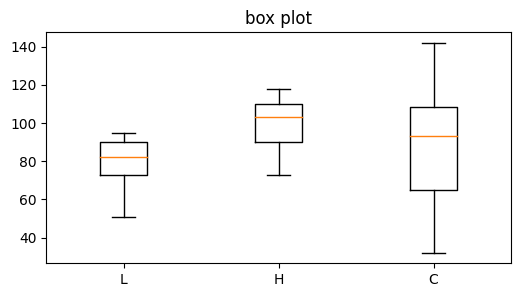

In [195]:
pltData = [value for value in DATA.values()]
pltLabel = [key for key in DATA.keys()]

fig, ax = plt.subplots(figsize=(6, 3))
# 箱ひげ図 sym : 外れ値
ax.boxplot(pltData, labels=pltLabel, sym='gD')
ax.set_title('box plot')
plt.show()

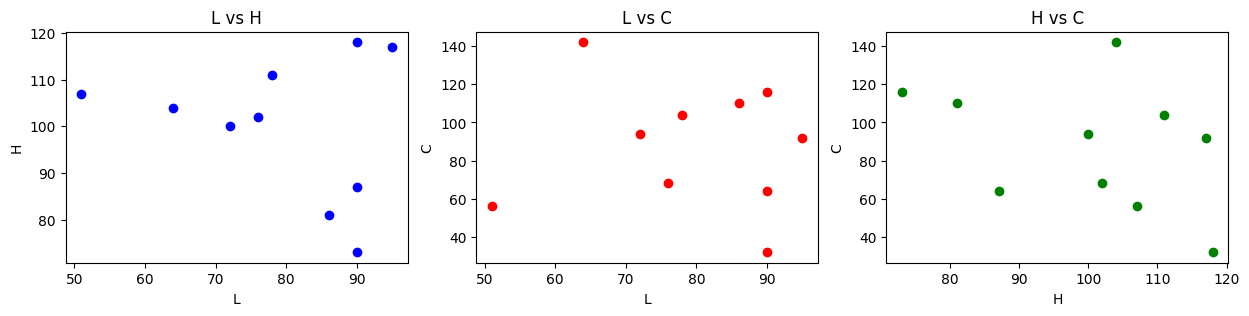

In [196]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
color = ['b', 'r', 'g']
for i, (first, second) in enumerate(list(combinations(DATA.keys(), 2))):
    ax[i].scatter(DATA[first], DATA[second], color=color[i])
    ax[i].set_title(f'{first} vs {second}')
    ax[i].set_xlabel(first)
    ax[i].set_ylabel(second)
    
plt.show()

# python による統計量の表示
- pandas : describe により各統計量を表示
- scipy  : describe により データ数、最小最大、平均、不偏分散、歪度、尖度
- numpy  : np.min(), np.max(), np.mean(), np.var(), np.std() などにより各統計量を表示

In [197]:
# pandas
df = pd.DataFrame(DATA)
# print(df.std(ddof=1))
df.describe()

,L,H,C
count,10.000000,10.000000,10.000000
mean,79.200000,100.000000,87.800000
std,13.886844,15.136417,32.706778
min,51.000000,73.000000,32.000000
25%,73.000000,90.250000,65.000000
50%,82.000000,103.000000,93.000000
75%,90.000000,110.000000,108.500000
max,95.000000,118.000000,142.000000


In [198]:
# scipy
def describe_results_by_scipy(data):
    describeResults = list(describe(data))
    stats = ['nobs', 'minmax', 'mean', 'variance', 'skewness', 'kurtosis']
    for stat, result in zip(stats, describeResults):
        print(f'{stat} : {result}')

describe_results_by_scipy(DATA['L'])

nobs : 10
minmax : (51, 95)
mean : 79.2
variance : 192.84444444444446
skewness : -0.8006692641981255
kurtosis : -0.3646334947705996


In [199]:
# numpy
def describe_results_by_numpy(data):
    describeResults = np.min(data), np.max(data), np.mean(data), np.var(data, ddof=1), np.std(data, ddof=1), np.quantile(DATA['L'], q=0.25), np.quantile(DATA['L'], q=0.5), np.quantile(DATA['L'], q=0.75)
    stats = ['min', 'max', 'mean', 'variance', 'std', '25%', '50%', '75%'] 
    for stat, result in zip(stats, describeResults):
        print(f'{stat} : {result}')

describe_results_by_numpy(DATA['L'])


min : 51
max : 95
mean : 79.2
variance : 192.84444444444443
std : 13.88684429395118
25% : 73.0
50% : 82.0
75% : 90.0


# 相関係数

In [200]:
for f, s in list(combinations(DATA.keys(), 2)):
    print(f'correlation coefficient {f} vs {s} : {df.corr().loc[f,s]:.03f}')
df.corr()

correlation coefficient L vs H : -0.199
correlation coefficient L vs C : -0.065
correlation coefficient H vs C : -0.376


,L,H,C
L,1.000000,-0.198755,-0.064975
H,-0.198755,1.000000,-0.375709
C,-0.064975,-0.375709,1.000000


# 偏相関係数

In [201]:
# 偏相関係数
for f, s in list(combinations(DATA.keys(), 2)):
    print(f'partial correlation coefficient {f} vs {s} : {pg.pcorr(df).loc[f,s]:.03f}')
pg.pcorr(df)

partial correlation coefficient L vs H : -0.241
partial correlation coefficient L vs C : -0.154
partial correlation coefficient H vs C : -0.397


,L,H,C
L,1.000000,-0.241319,-0.153756
H,-0.241319,1.000000,-0.397374
C,-0.153756,-0.397374,1.000000


# T 値
$$

$$

In [202]:
muL = np.mean(DATA['L'])
varL = np.var(DATA['L'], ddof=1)
muH = np.mean(DATA['H'])
varH = np.var(DATA['H'], ddof=1)
n = df.shape[0]
print(f'L mean : {muL}')
print(f'L std : {np.sqrt(varL)}')
print(f'H mean : {muH}')
print(f'H std : {np.sqrt(varH)}')
tValue = (muL - muH) / np.sqrt(varL / n + varH / n)
print(f't value : {tValue}')

L mean : 79.2
L std : 13.88684429395118
H mean : 100.0
H std : 15.136416719656971
t value : -3.202063796256733


# P 値
- 両側検定 (Welch仮定、等分散仮定)
- 片側 less (Welch仮定、等分散仮定)
- 片側 greater (Welch仮定、等分散仮定)

In [207]:
# Welch の方法
tValueW, pValueW = ttest_ind(DATA['L'], DATA['H'], equal_var=True, alternative='two-sided')
print(tValueW, pValueW)
# 等分散の仮定
tValue, pValue = ttest_ind(DATA['L'], DATA['H'], equal_var=False, alternative='two-sided')
print(tValue, pValue)

-3.202063796256733 0.004940025960533674
-3.202063796256733 0.004975290113360172


In [208]:
# Welch の方法
tValueW, pValueW = ttest_ind(DATA['L'], DATA['H'], equal_var=True, alternative='less')
print(tValueW, pValueW)
# 等分散の仮定
tValue, pValue = ttest_ind(DATA['L'], DATA['H'], equal_var=False, alternative='less')
print(tValue, pValue)

-3.202063796256733 0.002470012980266837
-3.202063796256733 0.002487645056680086


In [209]:
# Welch の方法
tValueW, pValueW = ttest_ind(DATA['L'], DATA['H'], equal_var=True, alternative='greater')
print(tValueW, pValueW)
# 等分散の仮定
tValue, pValue = ttest_ind(DATA['L'], DATA['H'], equal_var=False, alternative='greater')
print(tValue, pValue)

-3.202063796256733 0.9975299870197332
-3.202063796256733 0.9975123549433199


## 区間推定
### 母平均 $\mu$ に関する区間推定
$$ X \sim N(\mu, \ \sigma^2) \rightarrow \bar{X} \sim N \Big(\mu, \ \frac{\sigma^2}{n} \Big) $$
- 母分散が既知 or $n>30$ $\rightarrow$ 標準正規分布 $N(0, \ 1)$
$$ \mu = \bar{x} \pm z_{\alpha/2} \sqrt{\frac{\sigma^2}{n}} $$
- 母分散が未知 のとき $\rightarrow$ 自由度 $n-1$ の $t$ 分布
$$ \mu = \bar{x} \pm t_{\alpha/2} \sqrt{\frac{\hat{\sigma}^2}{n}} $$

### 母分散 $\sigma^2$ に関する区間推定
- $\chi^2$ 分布
$$
\chi^2 = \frac{\sum(x_i-\bar{x})^2}{\sigma^2} = \frac{(n-1)\hat{\sigma}^2}{\sigma^2} \sim \chi^2(n-1)
$$
- $\chi^2$ による 母分散の区間推定
$$
\frac{(n-1)\hat{\sigma}^2}{\chi^2_{a/2}(n-1)} \leq \sigma^2 \leq \frac{(n-1)\hat{\sigma}^2}{\chi^2_{1-a/2}(n-1)}
$$

In [ ]:
# normal distribution
# n は標本平均の分散にのみ影響する
n, mean, std = 20, 909, 104.9
for alpha in [0.90, 0.95, 0.99]:
    cl_bottom, cl_up = norm.interval(alpha, loc=mean, scale=std/np.sqrt(n))
    print(f'{alpha:.02f} confidence interval : [{cl_bottom:.02f}, {cl_up:.02f}]')

0.90 confidence interval : [870.42, 947.58]
0.95 confidence interval : [863.03, 954.97]
0.99 confidence interval : [848.58, 969.42]


In [ ]:
n, mean, std = 20, 909, 104.9
# t distribution
# n は標本平均の分散とt分布の形に影響する
for alpha in [0.90, 0.95, 0.99]:
    tvalue = t.isf(q=(1-alpha)/2, df=n-1)
    print(f'tvalue : {tvalue}')
    cl_bottom, cl_up = t.interval(alpha, n-1, loc=mean, scale=std/np.sqrt(n))
    print(f'{alpha:.02f} confidence interval : [{cl_bottom:.02f}, {cl_up:.02f}]')


tvalue : 1.729132811521368
0.90 confidence interval : [868.44, 949.56]
tvalue : 2.093024054408263
0.95 confidence interval : [859.91, 958.09]
tvalue : 2.860934606449914
0.99 confidence interval : [841.89, 976.11]


In [ ]:
#
chi2.isf(q=0.025, df=19)



1.7291328115213678

# 回帰分析

In [10]:
df = pd.read_csv('../notebooks/winequality-red.csv', sep=';', encoding='utf-8')
x = df[['density', 'volatile acidity']] # independent variable
y = df['alcohol'] # dependent variable

import statsmodels.api as sm
result = sm.OLS(y, sm.add_constant(x)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     314.7
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          6.11e-116
Time:                        14:14:38   Log-Likelihood:                -2104.3
No. Observations:                1599   AIC:                             4215.
Df Residuals:                    1596   BIC:                             4231.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              287.9034     11.932  

In [ ]:
# model_lr = LinearRegression()
# x, y = df[['x']], df[['y']]
# model_lr.fit(x, y)

# print(f'regression coefficient w1: {model_lr.coef_[0][0]:.3f}')
# print(f'intercept w2: {model_lr.intercept_[0]:.3f}')
# print(f'y = {model_lr.coef_[0][0]:.03f}x + {model_lr.intercept_[0]:.03f}')

# plt.plot(df.x, df.y, 'o')
# plt.plot(df.x, model_lr.predict(x))
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('sciket-learn')
# plt.show()

z stats : 3.719016485455709
0.90 confidence interval : [870.42, 947.58]
0.95 confidence interval : [863.03, 954.97]
0.99 confidence interval : [848.58, 969.42]
t stats : 3.579400148163749
0.90 confidence interval : [870.42, 947.58]
0.95 confidence interval : [863.03, 954.97]
0.99 confidence interval : [848.58, 969.42]


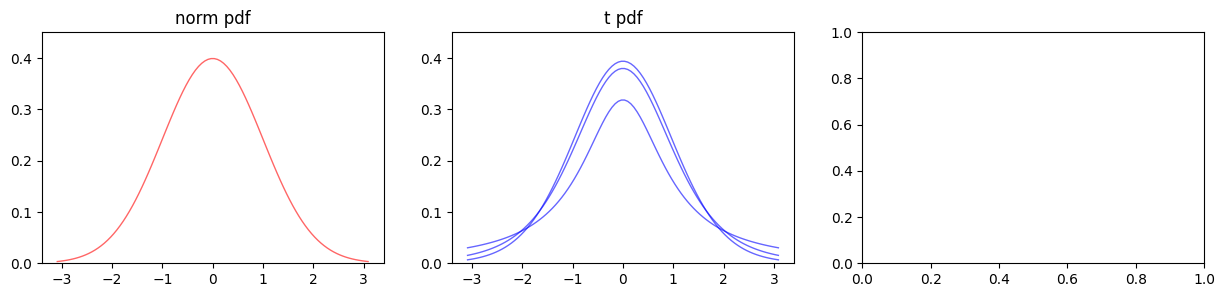

In [239]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

mean, var, skew, kurt = norm.stats(moments='mvsk')

# z stats
n, mean, std = 20, 909, 104.9
alpha = 0.0001
print(f'z stats : {norm.ppf(1-alpha)}')
# 区間推定
for alpha in [0.90, 0.95, 0.99]:
    cl_bottom, cl_up = norm.interval(alpha, loc=mean, scale=std/np.sqrt(n))
    print(f'{alpha:.02f} confidence interval : [{cl_bottom:.02f}, {cl_up:.02f}]')
    
# t stats
n, mean, std = 20, 909, 104.9
alpha = 0.001
print(f't stats : {t.ppf(1-alpha, n-1)}')
# 区間推定
for a in [0.90, 0.95, 0.99]:
    cl_bottom, cl_up = norm.interval(a, loc=mean, scale=std/np.sqrt(n))
    print(f'{a:.02f} confidence interval : [{cl_bottom:.02f}, {cl_up:.02f}]')


# destribution
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
x = np.linspace(norm.ppf(alpha), norm.ppf(1-alpha), 100)
ax[0].plot(x, norm.pdf(x), 'r-', lw=1, alpha=0.6)
ax[0].set_title('norm pdf')
ax[0].set_ylim([0, 0.45])

for dof in [n-1, 5, 1]:
    ax[1].plot(x, t.pdf(x, df=dof), 'b-', lw=1, alpha=0.6)
ax[1].set_title('t pdf')
ax[1].set_ylim([0, 0.45])
plt.show()

(0.0, 0.438836508441576)

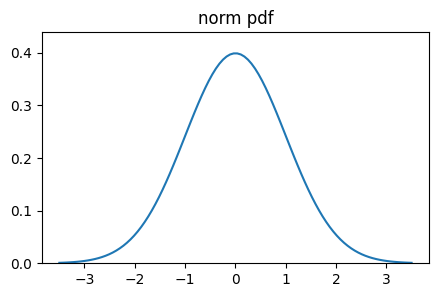

In [42]:
from scipy import stats

mean, var = 0, 1
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
x = np.linspace(mean-3.5*var, mean+3.5*var, 100)
ax.plot(x, stats.norm.pdf(x, loc=mean, scale=var))
ax.set_title('norm pdf')
ax.set_ylim([0, stats.norm.pdf(mean, loc=mean, scale=var)*1.1])